# Deleting Nodes without Data and more  
Applications that were used: Cytoscape (v.3.8.2) and Jupyter Notebooks (v.2.2.6) through the Anaconda navigator (v.1.10.0).

In Cytoscape, the following app was installed: FileTransfer (v.1.1) for communication to Jupyter notebooks. 
To install apps in Cytoscape go to Apps -> App Manager -> Search

For those new to working with Jupyter Notebooks, go to the [MarkDown Tutorial](https://www.markdowntutorial.com/lesson/1/) to learn how to comment your code properly. 

Now let's move on to the code. 

## Here we will be deleting nodes without data.

## Step 1a: Importing Required Packages

In [1]:
import os
import sys
import requests
import pandas as pd
import py4cytoscape as p4c
from lxml import etree as ET

## Step 1b: Load code that prevents unwanted logging error

In [2]:
from logging import getLogger, INFO
from concurrent_log_handler import ConcurrentRotatingFileHandler

In [3]:
log = getLogger()
# Use an absolute path to prevent file rotation trouble.
logfile = os.path.abspath("py4cytoscape.log")
# Rotate log after reaching 512K, keep 5 old copies.
rotateHandler = ConcurrentRotatingFileHandler(logfile, "a", 512*1024, 5)
log.addHandler(rotateHandler)
log.setLevel(INFO)

log.info("Here is a very exciting log message, just for you")

Check py4cytoscape version

In [4]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.8.2',
 'automationAPIVersion': '1.2.0',
 'py4cytoscapeVersion': '0.0.9'}

## Step 2: Loading an existing network

We are using a previously created network in .cys format. First we will define a new variable to the file path and then a new variable to the path+file name. You can also import files of different formats, such as the .sif format. Look into py4cytoscape documentation on how to import different file types. 

In [5]:
path = 'C:/Users/stefa/Documents/GitHub/2021-internship/Raats/'
file_name = path + 'networkSigandExp.cys'
file_name

'C:/Users/stefa/Documents/GitHub/2021-internship/Raats/networkSigandExp.cys'

Now we will load this network in cytoscape

In [6]:
abs_file_name = os.path.abspath(file_name)

In [7]:
session_cmd_list = ['session','open','file="',abs_file_name,'"']
session_cmd = " ".join(session_cmd_list)

In [8]:
p4c.commands.commands_run(session_cmd)

[]

## Step 3a: Deleting nodes without data  
We want to only select nodes of the type genes that have no data.

In [9]:
p4c.tables.get_table_column_names('node')

['SUID',
 'shared name',
 'name',
 'selected',
 'GraphID',
 'Type',
 'XrefId',
 'XrefDatasource',
 'Color',
 'Border Width',
 'Node Size',
 'Label Font Size',
 'Ensembl',
 'CTL.Ext',
 'CTL.Type',
 'CTL.PathwayName',
 'CTL.label',
 'CTL.PathwayID',
 'CTL.GeneName',
 'CTL.GeneID',
 'Unnamed: 0',
 'logFC',
 'logCPM',
 'F',
 'PValue',
 'FDR']

In my case, 'CTL.Type' is the column that defines node types. We will use this to create a filter that only selects nodes of the type gene.  

In [10]:
only_genes_filter = p4c.create_column_filter('only_genes_filter','CTL.Type', 'gene',  "IS")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


Now we create a column filter for nodes with no data on expression. To do this, we could select all nodes that fall outside the minimum and maximum values of the column 'logFC', which defines expression. This means only blank no data nodes would be selected. 

In [14]:
exp_score_table = p4c.tables.get_table_columns('node', 'logFC')
exp_min = min(exp_score_table['logFC'])
exp_max = max(exp_score_table['logFC'])
print(exp_min)
print(exp_max)

-1.6662939468468898
4.79871351926883


Alternatively, we can simply select all gene nodes that do not fall between certain absurd values, such as -1000 and 1000. No gene will have these values for expression, which means the code will select all nodes that are blank.     

This is much easier to code. If you wish to use the minimum and maxium values, simply replace the -1000 and 1000 with the variables exp_min and exp_max

In [11]:
no_expr_data = p4c.create_column_filter('no_expr_data','logFC', [-1000, 1000], "IS_NOT_BETWEEN")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


Now we combine the expression filter and the only genes filter together. 

In [12]:
combined_filter = p4c.create_composite_filter('combined_filter', ['no_expr_data', 'only_genes_filter'])

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


In [13]:
p4c.delete_selected_nodes()

{'nodes': [2250,
  2231,
  2309,
  2275,
  2257,
  2342,
  2175,
  2316,
  2253,
  2417,
  2223,
  2238,
  2264,
  2384,
  2344,
  2302,
  2163,
  2111,
  2118,
  2166,
  2105,
  2340,
  2248,
  2311,
  2255,
  2114,
  2286,
  2226,
  2146,
  2299,
  2179,
  2327,
  2313,
  2343,
  2145,
  2195,
  2233,
  2212,
  2127,
  2270,
  2237,
  2326,
  2117,
  2128,
  2279,
  2300,
  2102,
  2312,
  2314,
  2169,
  2247,
  2259,
  2222,
  2192,
  2323,
  2097,
  2198,
  2218,
  2265,
  2303,
  2110,
  2381,
  2256,
  2136,
  2186,
  2224,
  2278,
  2345,
  2204,
  2119,
  2291,
  2170,
  2143,
  2320,
  2383,
  2335,
  2376,
  2249,
  2167,
  2208,
  2230,
  2081,
  2171,
  2277,
  2112,
  2260,
  2200,
  2378,
  2155,
  2142,
  2085,
  2292,
  2188,
  2273,
  2099,
  2315,
  2172,
  2289,
  2276,
  2219,
  2334,
  2262,
  2350,
  2246,
  2181,
  2174,
  2306,
  2294,
  2397,
  2087,
  2296,
  2229,
  2153,
  2213,
  2280,
  2227,
  2234,
  2319,
  2106,
  2266,
  2293,
  2274,
  2093,
  2147,

Let's fix the layout again. 

In [14]:
p4c.layout_network()

{}

## Step 3b: Viewing our output in Jupyter. 

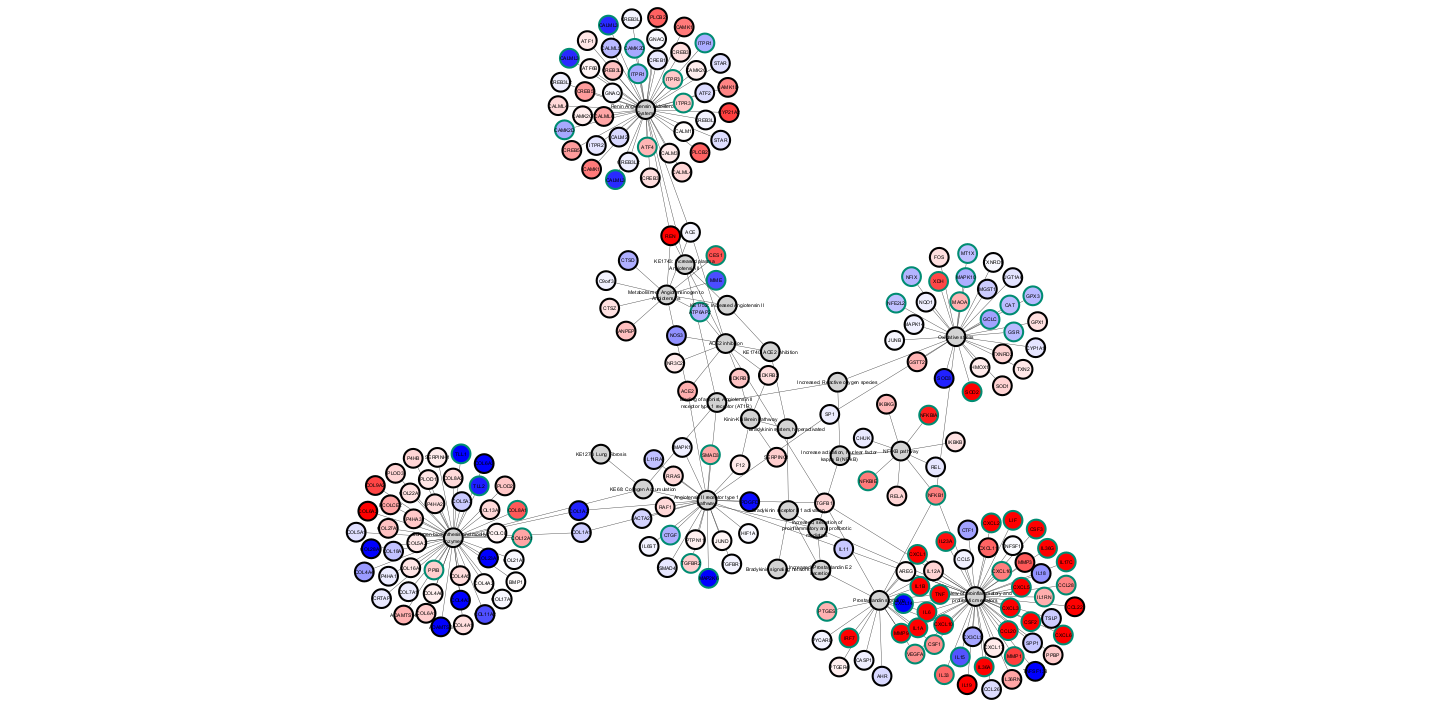

In [19]:
p4c.export_image(filename='delNetwork.png')
p4c.sandbox_get_from('delNetwork.png')
from IPython.display import Image
Image('delNetwork.png')

## Step 4a: Specific KE   
Now you might want to select specific KE and delete those. In my case, I will delete every pathway on the right of the AOP in WikiPathways 5035. This means the bradykinin system, bradykinin receptor b1 activation and increased prostaglandin e2 section and their associated pathways.       

We could write down the whole name to be very specific, and to be sure it does not delete any nodes that we want to keep. However, since it is a small network, we can clearly see all the names of my nodes. Thus, we only need to write down a fraction of the KE name, to remove the unwanted nodes. 

In [20]:
namefilter = p4c.create_column_filter('namefilter','name', 'prostaglandin',  "CONTAINS")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


In [21]:
p4c.delete_selected_nodes()

{'nodes': [3775, 3755],
 'edges': [4527,
  4529,
  4530,
  4531,
  4535,
  4539,
  4540,
  4541,
  4542,
  4547,
  4260,
  4549,
  4551,
  4520,
  4553,
  4554,
  4522,
  4555,
  4523,
  4524,
  4525,
  4526]}

In [22]:
namefilter = p4c.create_column_filter('namefilter','name', 'kinin',  "CONTAINS")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


In [23]:
p4c.delete_selected_nodes()

{'nodes': [3754, 3773, 3774, 3767],
 'edges': [4256, 4258, 4519, 4521, 4427, 4428, 4253, 4429, 4254]}

## Step 4b: Viewing our output in Jupyter

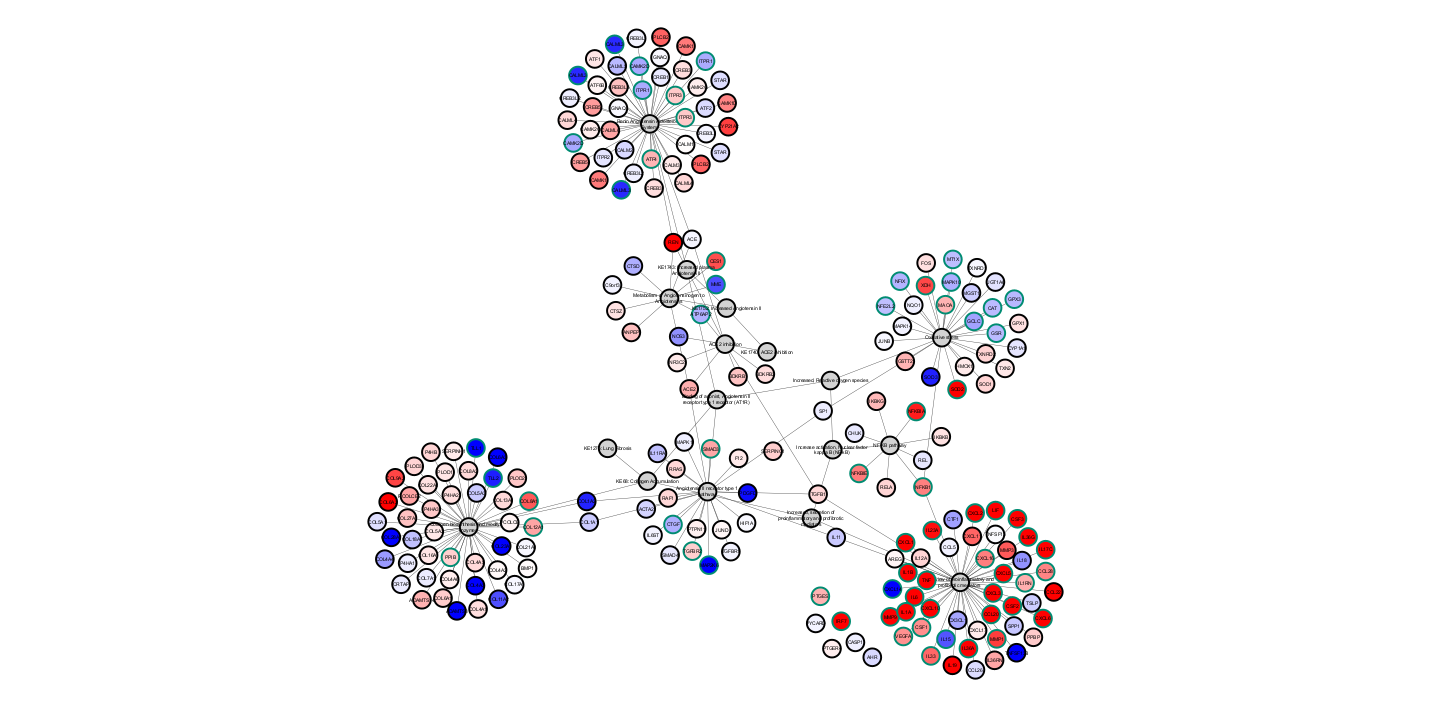

In [24]:
p4c.export_image(filename='stefanNetwork.png')
p4c.sandbox_get_from('stefanNetwork.png')
from IPython.display import Image
Image('stefanNetwork.png')